## Statistics - 5 : Hypothesis Tests
- this is one of the most important and practical topics in statistics for data analysts and data scientists.
- Hypothesis testing is a statistical method used to make decisions or inferences about a population using sample data. It helps answer questions like:
    - “Is the average income higher this year?”
    - “Do two groups have different means?”
    - “Are two variables related?”
- Concept
    - Null hypothesis (H₀) : there’s no effect or no difference (the default assumption
    - Alternative hypothesis (H₁ or Hₐ) : There is an effect or difference
- Steps
    - Collect sample data
    - Choose a test & significance level (usually α = 0.05)
    - Compute a test statistic and p-value
    - Reject or fail to reject H₀

#### Example
- A company claims the average battery life is 10 hours. You test 30 samples — is the mean really 10 hours?
    - H₀: μ = 10
    - H₁: μ ≠ 10
- If p-value < 0.05 → reject H₀ → significant difference.

## Types of Hypothesis 
- Type : Used for: Data Types : Python Function
- One-sample t-test : Compare sample mean to a known value : Continuous : scipy.stats.ttest_1samp()
- Two-sample t-test : Compare means of two independent groups Continuous scipy.stats.ttest_ind()
- Paired t-test Compare means of two related samples Continuous (paired) scipy.stats.ttest_rel()
- Chi-square test : Test association between categorical variables Categorical scipy.stats.chi2_contingency()
- ANOVA (F-test) : Compare means across 3+ groups Continuous scipy.stats.f_oneway()
- Mann–Whitney U / Wilcoxon Non-parametric alternativesContinuous (non-normal) mannwhitneyu(), wilcoxon()
- Z-test Compare means with known σ (large samples) Continuous statsmodels.stats.weightstats.ztest()


### 1-sample t-test
- Compare sample mean to a known population mean.

In [4]:
from scipy.stats import ttest_1samp
import numpy as np
data = np.random.normal(loc=52, scale=5, size=30)  # sample data
data

array([62.28896527, 52.07590173, 56.75196727, 51.19010169, 55.2892113 ,
       48.35897034, 58.20114342, 49.01821369, 52.23667603, 52.12417957,
       54.21118476, 43.77920379, 43.60226687, 49.55373582, 51.27167881,
       47.61200986, 55.97088067, 52.28056548, 49.23902399, 53.35787223,
       54.88321158, 48.7569575 , 66.25046707, 50.93151616, 54.74706102,
       52.96020512, 48.98916399, 53.41586877, 46.66372834, 45.960507  ])

In [5]:
t_stat, p_val = ttest_1samp(data, popmean=50)

print("t-statistic:", t_stat)
print("p-value:", p_val)

t-statistic: 2.29955245499454
p-value: 0.028865919531279902


### Interpretation:
    - If p_val < 0.05 → Reject H₀ (mean ≠ 50)
    - If p_val ≥ 0.05 → Fail to reject H₀

###  Independent two-sample t-test
- Compare means of two independent groups
- If p < 0.05 → significant difference between groups.

In [8]:
from scipy.stats import ttest_ind

group1 = np.random.normal(50, 5, 30)
group2 = np.random.normal(55, 5, 30)
print("Group-1 :", group1, '\n Group-2 : ', group2)

Group-1 : [47.47987833 51.85860605 51.09450048 53.55713543 52.89833559 44.99536402
 43.74301688 51.9590903  54.31806811 55.98190912 51.73069469 44.14466685
 48.84763026 45.59430492 48.09161632 32.732473   48.15366543 47.10495119
 52.18559773 46.91124775 52.17690541 56.6237015  44.25143106 54.13268793
 56.72379819 51.40371814 50.13592168 38.52090977 47.87356382 61.46907978] 
 Group-2 :  [56.09587375 61.03347648 55.23287278 58.90798595 54.99822806 54.21570387
 52.49324774 61.30676023 47.03245832 55.84652348 51.68022911 52.43686413
 49.46014832 52.80947801 56.88467372 51.85601864 61.59309644 61.25058275
 58.26906506 45.86440357 57.64103867 63.74562356 56.3419423  52.53025442
 45.72823664 58.94695114 60.14892247 56.54707219 57.84408537 50.45921636]


In [9]:
t_stat, p_val = ttest_ind(group1, group2)
print("t-statistic:", t_stat, "p-value:", p_val)

t-statistic: -4.236181351707093 p-value: 8.233721967178027e-05


### Paired t-test
- For before/after or matched pairs.
-  If p < 0.05 → the treatment had a significant effect.

In [10]:
from scipy.stats import ttest_rel

before = np.random.normal(100, 10, 30)
after = before - np.random.normal(5, 3, 30)  # after treatment
print("Before :", before, '\n After : ', after)

Before : [ 94.03582845  87.36025955 113.4461476   98.25346308 102.34241127
  86.13881563 117.24706098  90.99590207 117.3217878  102.84971186
  82.0403358   89.03662116 110.75427926  92.87408724  99.0164769
 107.37701213 107.78272092  93.72752394  81.29905174 108.86870209
  93.44449029 114.10109758  94.04648774  91.04525947  85.55498216
  92.40257636 111.58405325  93.40363557 111.78916321  99.87785873] 
 After :  [ 85.90637501  86.05537151 114.87334063  92.78201381  96.80756785
  81.08835045 109.69092238  82.09209268 112.9014592   95.36182133
  73.94986854  82.48221542 110.26231328  84.1547615   95.92004097
 101.50841566 104.62053661  92.03337104  81.10796473  97.39281957
  86.71442835 105.1279175   84.8759178   86.97923091  84.41431718
  86.01177987 105.18575264  91.08049623 109.62496086  97.83857692]


In [11]:
t_stat, p_val = ttest_rel(before, after)
print("t-statistic:", t_stat, "p-value:", p_val)

t-statistic: 8.535966992141878 p-value: 2.1032123660247787e-09


### Chi-square test
-  Check if two categorical variables are related.
-  If p < 0.05 → significant relationship between gender & product liking.

In [13]:
import pandas as pd
from scipy.stats import chi2_contingency

# Example contingency table
data = pd.DataFrame({
    "Male": [30, 10],
    "Female": [20, 40]
}, index=["Like Product", "Don’t Like"])
data

,Male,Female
Like Product,30,20
Don’t Like,10,40


In [14]:
chi2, p, dof, expected = chi2_contingency(data)

print("Chi2:", chi2)
print("p-value:", p)

Chi2: 15.041666666666668
p-value: 0.00010516355403363098


### ANOVA (3 or more groups)
- Compare multiple group means.
- If p < 0.05 → at least one group mean differs.

In [22]:
from scipy.stats import f_oneway

groupA = np.random.normal(50, 5, 30)
groupB = np.random.normal(55, 5, 30)
groupC = np.random.normal(60, 5, 30)
print('A : ', groupA, '\n B: ',  groupB, '\n C: ', groupC)

A :  [60.18111109 43.4000289  52.92207134 52.24422786 49.05249784 47.60813103
 54.65026133 53.23530838 44.63877391 48.81749339 55.07362344 44.23141224
 46.54878909 46.17126169 44.88041306 46.93097282 42.34764063 46.77294834
 52.70930282 47.66502598 46.63311881 52.50644369 51.91737559 51.33443895
 51.0000101  52.52539207 56.35455549 53.04171157 47.38368295 52.25537735] 
 B:  [63.18329234 58.85694196 51.04221887 54.27945464 57.91220326 59.71694109
 53.44021224 54.73851503 56.78792109 52.59203912 62.34134485 56.51436573
 57.50449722 58.67649594 56.70892804 56.44976295 61.62306149 48.18326207
 57.36650913 57.70655646 49.24454484 50.49926561 62.00670095 54.05602113
 53.64051443 57.11267007 58.65413363 59.84972172 49.56514147 55.32282033] 
 C:  [60.69629092 50.37692211 59.20402925 57.1958843  63.48125623 59.43245697
 68.2203806  60.47004382 67.53289614 61.17308433 63.25018951 58.23660683
 59.82269122 65.17353437 50.0757448  58.69172744 60.33184399 60.20038415
 56.67888411 65.92930134 59.4599

In [ ]:
f_stat, p_val = f_oneway(groupA, groupB, groupC)
print("F-statistic:", f_stat, "p-value:", p_val)

## Which test to do

- practice each path in Python:
    - One-sample t-test → compare sample mean vs known mean
    - Chi-square test → compare survey responses (gender × preference)
    - ANOVA → compare scores across departments
    - Correlation → analyze mpg vs wt in the mtcars dataset

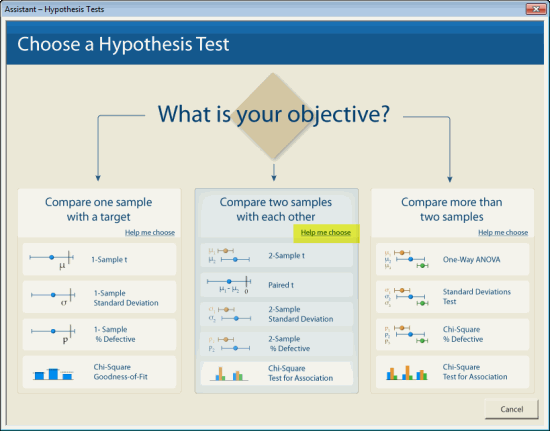